### About Chronic Hunger
Following a decade long decline, global hunger appears to again be on the rise. According to the Food and Agricultural Organization of the United Nations, chronic hunger affects 11% of the world's population. Nearly one in four children under the age of 5 is affected by stunting, which can impair cognitive ability, decrease lifetime earnings, and increase risk of dying from an infection.

According to a 2017 report on the State of Food Security and Nutrition:

There is more than enough food produced in the world to feed everyone, yet 815 million people go hungry. As reflected in Sustainable Development Goal 2 (SDG 2), one of the greatest challenges the world faces is how to ensure that a growing global population - projected to rise to around 10 billion by 2050 – has enough food to meet their nutritional needs.

This is exacerbated by an increasing frequency of climate related shocks such as droughts, which can wipe out farmers' crops and tilt the needle from a situation of food insecurity to famine. Food security is further impacted by violent conflicts around the globe, which can disrupt food production and availability.

However, the presence of these factors, and consequently levels of chronic hunger, differ across countries. Now, we are challenging you to use your skills to consider which economic, social, and political factors are indicative of trends in chronic hunger in countries around the world.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [28]:
#load data from CSV
import pandas as pd
df=pd.read_csv('train_values.csv')
print('Data loaded')

Data loaded


In [29]:
df.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,total_population,urban_population,population_growth,avg_value_of_food_production,cereal_import_dependency_ratio,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,imports_of_goods_and_services,inequality_index,net_oda_received_percent_gni,net_oda_received_per_capita,tax_revenue_share_gdp,trade_in_services,per_capita_food_production_variability,per_capita_food_supply_variability,adult_literacy_rate,school_enrollment_rate_female,school_enrollment_rate_total,avg_supply_of_protein_of_animal_origin,caloric_energy_from_cereals_roots_tubers,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,obesity_prevalence,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,60.452227,1.354087e+07,1.889951e+07,5.086453e+06,2.864931,60.891336,78.452754,22.080539,3969.519106,38.351804,NaN,2.233562,11.658979,NaN,NaN,1.968090,15.693492,NaN,NaN,NaN,11.024062,64.129571,43.286502,57.932801,59.061443,8.293940,28.933529,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,64.655419,4.070197e+06,6.447523e+06,2.267000e+06,1.299884,266.065999,-5.250878,8.897988,4527.258045,60.281899,36.537778,4.351315,63.833275,13.494452,8.929963,4.925827,26.481297,NaN,92.711279,96.392507,14.046164,68.285707,63.513220,71.120737,36.901084,2.483303,29.665789,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,74.347806,5.689435e+04,8.377729e+04,2.676756e+04,2.150029,111.633560,88.049596,58.906129,18513.524513,59.985174,NaN,1.282397,119.610589,12.521850,69.947271,2.179872,15.705757,NaN,NaN,NaN,47.203308,28.110750,85.820712,97.587324,27.242818,18.726448,1.331621,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,74.698405,3.743950e+06,1.120167e+07,7.282983e+06,1.185709,334.252960,NaN,NaN,10710.266707,57.608449,NaN,1.628241,64.966525,NaN,17.270456,15.789067,16.191112,NaN,NaN,99.837057,NaN,NaN,92.274315,95.611515,29.076919,23.218548,1.549191,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,NaN,2.289438e+04,7.070804e+04,4.734830e+04,0.173571,365.214142,101.256835,76.154103,10416.098948,62.709973,NaN,4.900721,296.248256,24.358865,40.227419,23.771783,55.067035,NaN,88.231298,88.082367,51.586010,34.326635,NaN,NaN,25.008846,20.010812,7.564733,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027


In [30]:
df.describe()

,row_id,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,total_population,urban_population,population_growth,avg_value_of_food_production,cereal_import_dependency_ratio,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,imports_of_goods_and_services,inequality_index,net_oda_received_percent_gni,net_oda_received_per_capita,tax_revenue_share_gdp,trade_in_services,per_capita_food_production_variability,per_capita_food_supply_variability,adult_literacy_rate,school_enrollment_rate_female,school_enrollment_rate_total,avg_supply_of_protein_of_animal_origin,caloric_energy_from_cereals_roots_tubers,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,obesity_prevalence,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
count,1401.000000,1401.000000,1.385000e+03,1153.000000,1337.000000,75.000000,1.385000e+03,1.401000e+03,1387.000000,1386.000000,1.401000e+03,1.401000e+03,1.401000e+03,1400.000000,1234.000000,1084.000000,1148.000000,1362.000000,1324.000000,429.000000,1237.000000,1239.000000,856.000000,1236.000000,1314.000000,1229.000000,285.000000,795.000000,897.000000,1149.000000,1149.000000,1327.000000,1339.000000,1321.000000,1244.000000,1381.000000,1030.000000,457.000000,1397.000000,1.317000e+03,1337.000000,1.337000e+03,1128.000000,1258.000000,1266.000000
mean,700.000000,2007.392577,3.539588e+05,27.891446,2753.178229,1.236800,2.329455e+05,8.181146e+05,3.251874,67.114055,2.658025e+07,4.499105e+07,1.840486e+07,1.636426,229.474310,34.372837,37.148536,10843.431197,45.479667,42.769171,6.105307,63.057700,16.409878,23.040995,10.571087,37.956586,79.632243,88.671496,90.253703,27.963569,50.888030,65.051761,83.299397,32.781667,12.765974,11.704861,0.218624,1.183129,73.795389,8.304671e+04,8.580335,1.871233e+07,1.919332,15.618462,-0.376020
std,404.578175,4.595501,1.172377e+06,28.577625,2777.815145,1.877823,9.266334e+05,2.792117e+06,1.471044,8.786850,1.052394e+08,1.546745e+08,5.150763e+07,1.299897,149.059092,51.937298,66.564902,15275.312948,22.840266,9.278521,12.020216,89.160660,7.863698,21.656509,12.304082,23.657067,18.228170,12.861256,11.165756,15.984387,13.925687,28.422340,15.284937,11.999315,8.360314,15.134440,0.523960,1.175000,31.280311,2.248360e+05,6.645133,6.112347e+07,1.480842,10.324280,0.858888
min,0.000000,2000.000000,2.944179e+00,0.000000,179.258873,0.000000,9.806688e+00,2.018306e+01,0.836053,38.204140,0.000000e+00,6.172455e+04,2.413844e+04,-2.872249,3.945363,-228.300258,0.990945,573.167687,0.065060,16.240718,-0.665359,-49.355612,0.057901,2.308559,0.300291,2.018557,24.140419,35.620178,35.335727,2.957107,22.589928,10.337271,30.784598,12.570471,0.699575,0.000000,0.009800,0.000000,0.010012,1.008288e+02,0.491115,3.490659e+04,0.000000,0.000000,-2.781258
25%,350.000000,2003.000000,1.174577e+04,3.490956,1424.503830,0.097420,4.159005e+03,2.507460e+04,2.175432,61.677998,8.349747e+05,1.516541e+06,8.101741e+05,0.904947,134.017278,11.263365,7.096791,2660.429745,29.304450,34.876147,0.428423,11.932109,12.007221,10.785630,4.173722,20.657348,66.774076,85.118872,87.014301,13.852991,39.581692,39.885271,74.227828,23.291372,4.767319,0.598210,0.010164,0.297713,51.062336,1.265778e+03,3.748595,9.076810e+05,1.033886,8.575444,-0.948167
50%,700.000000,2007.000000,4.701980e+04,18.846225,2221.920986,0.661379,2.224170e+04,1.309442e+05,2.751553,69.857724,3.373348e+06,7.378974e+06,3.511671e+06,1.546457,205.288999,35.044178,16.180817,6962.374527,42.388441,43.085267,2.168309,34.535966,15.187015,17.310528,7.024724,31.072933,87.026107,93.565459,94.641415,25.146310,50.305162,73.467877,88.441262,30.111470,12.833024,4.773481,0.040068,0.608198,89.156218,7.637910e+03,6.633461,3.411048e+06,1.538130,13.093035,-0.287659
75%,1

In [28]:
df.describe(include=['object'])

,country_code
count,1401
unique,92
top,7fb4d17
freq,16


In [29]:
df['country_code'].value_counts()

7fb4d17    16
ea0b937    16
71dc81f    16
2ddc563    16
81e884c    16
c3668f5    16
f405b98    16
0c0177b    16
5c2e474    16
085807f    16
07f8d11    16
2e5e810    16
7e222a7    16
b3dfc85    16
75e8f46    16
66b86bf    16
42c298b    16
6b615ad    16
a7d355b    16
c3782c8    16
12c8f8f    16
ea3bfc2    16
11c9833    16
611025c    16
fedb6c4    16
0593aa0    16
a0b37e7    16
d090b87    16
893d538    16
6303e84    16
508731a    16
04952a0    16
45a15a2    16
be60011    16
79c89fd    16
ee5721a    16
c8e4701    16
2ca26c6    16
9621c07    16
8fb5447    16
ba8e2c5    16
2f1d47e    16
066b021    16
30e2302    16
c9d2604    16
ed9ad13    16
9e614ab    16
4609682    16
e256731    16
0b6e276    16
5dbddf9    16
abd1492    16
22b9653    16
93d74a6    16
d680446    16
8e8dfae    16
99a7c06    16
b79b5f9    16
1881055    16
100c476    16
f787860    16
3e049d7    16
0ea781c    16
889f053    16
ba2039a    16
583201c    16
d3a0eeb    16
e15a18a    16
e8bfe1e    16
4080343    16
e509cda    16
cff4c5

### Loading the Target Variable
Here, we perform descriptive statistics on the target variable and the varaiable distribution.

In [53]:
Target=pd.read_csv('train_labels.csv')

In [420]:
Target.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,1401.0,700.000000,404.578175,0.000000,350.000000,700.000000,1050.000000,1400.000000
prevalence_of_undernourishment,1401.0,15.510697,11.610440,2.493428,5.710856,12.118656,22.447492,59.089781


In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


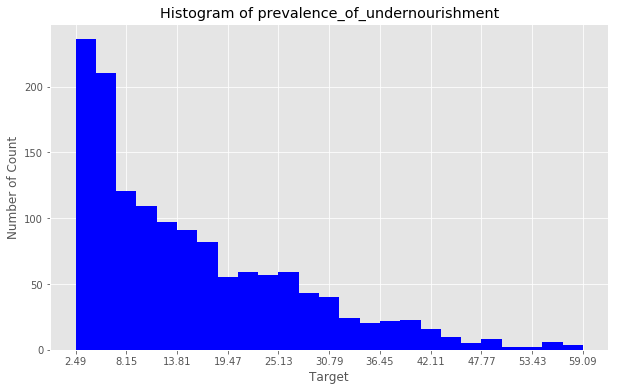

In [37]:
ax=Target['prevalence_of_undernourishment']
count, bin_edges = np.histogram(ax)
#binwidth = (max(ax)-min(ax))/25
#bin=np.arange(min(ax), max(ax) + binwidth, binwidth) 
ax.plot(kind='hist', figsize=(10, 6), 
        bins=25, 
        alpha=1,
        xticks=bin_edges,
        color=['blue'])

plt.title('Histogram of prevalence_of_undernourishment') # add a title to the histogram
plt.ylabel('Number of Count') # add y-label
plt.xlabel('Target') # add x-label

plt.show()

In [61]:
#merge the new dataframe to the original datafram
df = pd.concat([df, Target[['prevalence_of_undernourishment']]], axis=1)

# drop original column "row_id" from "df"
#df.drop('row_id', axis = 1, inplace=True)

In [62]:
df.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,total_population,urban_population,population_growth,avg_value_of_food_production,cereal_import_dependency_ratio,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,imports_of_goods_and_services,inequality_index,net_oda_received_percent_gni,net_oda_received_per_capita,tax_revenue_share_gdp,trade_in_services,per_capita_food_production_variability,per_capita_food_supply_variability,adult_literacy_rate,school_enrollment_rate_female,school_enrollment_rate_total,avg_supply_of_protein_of_animal_origin,caloric_energy_from_cereals_roots_tubers,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,obesity_prevalence,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,60.452227,1.354087e+07,1.889951e+07,5.086453e+06,2.864931,60.891336,78.452754,22.080539,3969.519106,38.351804,NaN,2.233562,11.658979,NaN,NaN,1.968090,15.693492,NaN,NaN,NaN,11.024062,64.129571,43.286502,57.932801,59.061443,8.293940,28.933529,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,31.260713
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,64.655419,4.070197e+06,6.447523e+06,2.267000e+06,1.299884,266.065999,-5.250878,8.897988,4527.258045,60.281899,36.537778,4.351315,63.833275,13.494452,8.929963,4.925827,26.481297,NaN,92.711279,96.392507,14.046164,68.285707,63.513220,71.120737,36.901084,2.483303,29.665789,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556,18.298233
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,74.347806,5.689435e+04,8.377729e+04,2.676756e+04,2.150029,111.633560,88.049596,58.906129,18513.524513,59.985174,NaN,1.282397,119.610589,12.521850,69.947271,2.179872,15.705757,NaN,NaN,NaN,47.203308,28.110750,85.820712,97.587324,27.242818,18.726448,1.331621,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586,39.513397
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,74.698405,3.743950e+06,1.120167e+07,7.282983e+06,1.185709,334.252960,NaN,NaN,10710.266707,57.608449,NaN,1.628241,64.966525,NaN,17.270456,15.789067,16.191112,NaN,NaN,99.837057,NaN,NaN,92.274315,95.611515,29.076919,23.218548,1.549191,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788,4.444016
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,NaN,2.289438e+04,7.070804e+04,4.734830e+04,0.173571,365.214142,101.256835,76.154103,10416.098948,62.709973,NaN,4.900721,296.248256,24.358865,40.227419,23.771783,55.067035,NaN,88.231298,88.082367,51.586010,34.326635,NaN,NaN,25.008846,20.010812,7.564733,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027,4.940301


In [65]:
# grouping results
df_gp=df[['country_code','year','prevalence_of_undernourishment']]
grouped_test1=df_gp.groupby(['year'],as_index= False).describe()
grouped_test1

year                                                       \
   count    mean  std     min     25%     50%     75%     max   
0   90.0  2000.0  0.0  2000.0  2000.0  2000.0  2000.0  2000.0   
1   90.0  2001.0  0.0  2001.0  2001.0  2001.0  2001.0  2001.0   
2   89.0  2002.0  0.0  2002.0  2002.0  2002.0  2002.0  2002.0   
3   90.0  2003.0  0.0  2003.0  2003.0  2003.0  2003.0  2003.0   
4   90.0  2004.0  0.0  2004.0  2004.0  2004.0  2004.0  2004.0   
5   88.0  2005.0  0.0  2005.0  2005.0  2005.0  2005.0  2005.0   
6   88.0  2006.0  0.0  2006.0  2006.0  2006.0  2006.0  2006.0   
7   89.0  2007.0  0.0  2007.0  2007.0  2007.0  2007.0  2007.0   
8   89.0  2008.0  0.0  2008.0  2008.0  2008.0  2008.0  2008.0   
9   87.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   
10  86.0  2010.0  0.0  2010.0  2010.0  2010.0  2010.0  2010.0   
11  88.0  2011.0  0.0  2011.0  2011.0  2011.0  2011.0  2011.0   
12  85.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
13  85.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
14  85.0  2014.0  0.0  2014.0  2014.0  2014.0  2014.0  2014.0   
15  82.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   

   prevalence_of_undernourishment                                            \
                            count       mean        std       min       25%   
0                            90.0  19.066560  13.587882  2.800627  7.370136   
1                            90.0  18.496627  13.314912  2.812526  6.733867   
2                            89.0  18.176207  13.024923  3.122717  6.594745   
3                            90.0  17.422474  12.718471  2.674083  6.124610   
4                            90.0  16.790406  12.306034  2.617246  6.117783   
5                            88.0  16.382479  11.817620  2.903838  5.977847   
6                            88.0  15.709370  11.294927  3.377525  5.904209   
7                            89.0  14.904472  10.899862  2.714942  5.481101   
8                            89.0  14.377057  10.576039  2.573207  5.131456   
9                            87.0  14.197342  10.258164  2.553789  5.672195   
10                           86.0  13.906598  10.047704  2.493428  5.570072   
11                           88.0  13.338796   9.972848  2.547776  5.503986   
12                           85.0  13.539924  10.057161  2.781669  5.657308   
13                           85.0  13.524395  10.455328  2.650630  5.482095   
14                           85.0  13.581782  11.033973  2.538720  5.392070   
15                           82.0  14.182315  11.543176  3.254613  5.530518   

                                     
          50%        75%        max  
0   16.218466  27.792727  54.806817  
1   15.442499  27.480620  56.143413  
2   15.053957  26.804336  57.728168  
3   14.977238  25.755058  58.458512  
4   12.918344  24.972714  57.698768  
5   12.060342  24.254894  56.716306  
6   11.999046  23.535648  55.979747  
7   11.940971  22.251222  54.881216  
8   11.488103  22.266185  52.610396  
9   11.398622  21.443764  51.681918  
10  11.296375  20.582427  49.672152  
11  10.517688  19.745612  50.344519  
12  10.223370  18.625996  49.297020  
13   9.693403  17.990710  49.678837  
14   9.318094  17.368144  55.782933  
15  10.693994  18.928462  59.089781

### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_couts()"  counts the number of "True" values. 

In [60]:
missing_data = testdata.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

row_id
False    616
Name: row_id, dtype: int64

country_code
False    616
Name: country_code, dtype: int64

year
False    616
Name: year, dtype: int64

agricultural_land_area
False    616
Name: agricultural_land_area, dtype: int64

percentage_of_arable_land_equipped_for_irrigation
False    616
Name: percentage_of_arable_land_equipped_for_irrigation, dtype: int64

cereal_yield
False    616
Name: cereal_yield, dtype: int64

droughts_floods_extreme_temps
False    616
Name: droughts_floods_extreme_temps, dtype: int64

forest_area
False    616
Name: forest_area, dtype: int64

total_land_area
False    616
Name: total_land_area, dtype: int64

fertility_rate
False    616
Name: fertility_rate, dtype: int64

life_expectancy
False    616
Name: life_expectancy, dtype: int64

rural_population
False    616
Name: rural_population, dtype: int64

total_population
False    616
Name: total_population, dtype: int64

urban_population
False    616
Name: urban_population, dtype: int64

population_growth
Fals

In [31]:
# Creating new variables
df['Urban_pop_share']=df['urban_population']/df['total_population']
df['rural_pop_share']=df['rural_population']/df['total_population']
df['agric_land_share']=df['agricultural_land_area']/df['total_land_area']

In [151]:
df_c=df.corr()
df_c.to_excel("select_var1.xls")

In [649]:
grouped_2=df_gp.groupby(['country_code','year'],as_index= False).max()
#grouped_2

### Create data for 10years ago and Now

In [124]:
yr_1=df[df.year==2005]

In [125]:
yr_2=df[df['year']==2015]

In [126]:
#Let's do a pandas merge
res = pd.merge(yr_1[['country_code','year', 'prevalence_of_undernourishment']], yr_2[['country_code','year', 'prevalence_of_undernourishment']],on='country_code', how='left')

In [127]:
res_=res.fillna(0)
df_dp=res.dropna() # here, our best bet is drop without 2015

In [128]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(res_['prevalence_of_undernourishment_x'], res_['prevalence_of_undernourishment_y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8844022957014209  with a P-value of P = 3.347313387102415e-30


In [129]:
pearson_coef, p_value = stats.pearsonr(df_dp['prevalence_of_undernourishment_x'], df_dp['prevalence_of_undernourishment_y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8725841787532054  with a P-value of P = 2.673228995321479e-26


In [143]:
df_gp.groupby(['country_code'],as_index= False).min()

,country_code,year,prevalence_of_undernourishment
0,04952a0,2000,6.006854
1,0593aa0,2000,24.953539
2,066b021,2000,30.171534
3,07f62b0,2000,2.617982
4,07f8d11,2000,22.098178
5,0845041,2000,2.647777
6,085807f,2000,7.802861
7,0b6e276,2000,3.849727
8,0c0177b,2000,4.765905
9,0ea781c,2000,2.955757


In [166]:
data=df[['row_id','year','country_code','prevalence_of_undernourishment','percentage_of_arable_land_equipped_for_irrigation', \
         'cereal_yield','droughts_floods_extreme_temps','fertility_rate','life_expectancy','population_growth', \
         'avg_value_of_food_production','food_imports_as_share_of_merch_exports','gross_domestic_product_per_capita_ppp', \
         'inequality_index','net_oda_received_percent_gni','tax_revenue_share_gdp','per_capita_food_production_variability',\
         'adult_literacy_rate','school_enrollment_rate_female','school_enrollment_rate_total','avg_supply_of_protein_of_animal_origin', \
        'caloric_energy_from_cereals_roots_tubers','access_to_improved_sanitation','access_to_improved_water_sources', \
        'anemia_prevalence','obesity_prevalence','open_defecation','rail_lines_density','access_to_electricity',\
        'co2_emissions','unemployment_rate','military_expenditure_share_gdp','political_stability',\
        'Urban_pop_share','rural_pop_share', 'agric_land_share']]

In [167]:
data.to_csv("Raw_Data.csv")

In [34]:
data=df

In [298]:
# missing_data = data.isnull()
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("") 

### Replace Missing Data with Means, Max and Zeros where necessary

In [35]:
# the assumption here is that if missing probably no irrigation system
data['percentage_of_arable_land_equipped_for_irrigation'].replace(np.nan, 0, inplace = True)
avg_1 = data['cereal_yield'].astype("float").mean(axis = 0)
data['cereal_yield'].replace(np.nan, avg_1, inplace = True)
data['droughts_floods_extreme_temps'].replace(np.nan, 0, inplace = True)
avg_2 = data['fertility_rate'].astype("float").mean(axis = 0)
data['fertility_rate'].replace(np.nan, avg_2, inplace = True)
avg_3 = data['life_expectancy'].astype("float").mean(axis = 0)
data['life_expectancy'].replace(np.nan, avg_3, inplace = True)
avg_4 = data['population_growth'].astype("float").mean(axis = 0)
data['population_growth'].replace(np.nan, avg_4, inplace = True)
avg_5 = data['avg_value_of_food_production'].astype("float").mean(axis = 0)
data['avg_value_of_food_production'].replace(np.nan, avg_5, inplace = True)
avg_6 = data['food_imports_as_share_of_merch_exports'].astype("float").mean(axis = 0)
data['food_imports_as_share_of_merch_exports'].replace(np.nan, avg_6, inplace = True)
avg_7 = data['gross_domestic_product_per_capita_ppp'].astype("float").mean(axis = 0)
data['gross_domestic_product_per_capita_ppp'].replace(np.nan, avg_7, inplace = True)
avg_8 = data['inequality_index'].astype("float").mean(axis = 0)
data['inequality_index'].replace(np.nan, avg_8, inplace = True)
avg_9 = data['net_oda_received_percent_gni'].astype("float").mean(axis = 0)
data['net_oda_received_percent_gni'].replace(np.nan, avg_9, inplace = True)
avg_10 = data['tax_revenue_share_gdp'].astype("float").mean(axis = 0)
data['tax_revenue_share_gdp'].replace(np.nan, avg_10, inplace = True)
avg_11 = data['per_capita_food_production_variability'].astype("float").mean(axis = 0)
data['per_capita_food_production_variability'].replace(np.nan, avg_11, inplace = True)
avg_12 = data['adult_literacy_rate'].astype("float").mean(axis = 0)
data['adult_literacy_rate'].replace(np.nan, avg_12, inplace = True)
avg_13 = data['school_enrollment_rate_female'].astype("float").mean(axis = 0)
data['school_enrollment_rate_female'].replace(np.nan, avg_13, inplace = True)
avg_14 = data['school_enrollment_rate_total'].astype("float").mean(axis = 0)
data['school_enrollment_rate_total'].replace(np.nan, avg_14, inplace = True)
avg_15 = data['avg_supply_of_protein_of_animal_origin'].astype("float").mean(axis = 0)
data['avg_supply_of_protein_of_animal_origin'].replace(np.nan, avg_15, inplace = True)
avg_16 = data['caloric_energy_from_cereals_roots_tubers'].astype("float").mean(axis = 0)
data['caloric_energy_from_cereals_roots_tubers'].replace(np.nan, avg_16, inplace = True)
avg_17 = data['access_to_improved_sanitation'].astype("float").mean(axis = 0)
data['access_to_improved_sanitation'].replace(np.nan, avg_17, inplace = True)
avg_18= data['access_to_improved_water_sources'].astype("float").mean(axis = 0)
data['access_to_improved_water_sources'].replace(np.nan, avg_18, inplace = True)
avg_19= data['anemia_prevalence'].astype("float").mean(axis = 0)
data['anemia_prevalence'].replace(np.nan, avg_19, inplace = True)
avg_20= data['obesity_prevalence'].astype("float").mean(axis = 0)
data['obesity_prevalence'].replace(np.nan, avg_20, inplace = True)
avg_21= data['open_defecation'].astype("float").mean(axis = 0)
data['open_defecation'].replace(np.nan, avg_21, inplace = True)
#railway not probably exit
data['rail_lines_density'].replace(np.nan, 0, inplace = True)
avg_22= data['access_to_electricity'].astype("float").mean(axis = 0)
data['access_to_electricity'].replace(np.nan, avg_22, inplace = True)
avg_23= data['co2_emissions'].astype("float").mean(axis = 0)
data['co2_emissions'].replace(np.nan, avg_23, inplace = True)
#assume that missing unemployment country has higher rate
max_1= data['unemployment_rate'].astype("float").max(axis = 0)
data['unemployment_rate'].replace(np.nan, max_1, inplace = True)
avg_24= data['military_expenditure_share_gdp'].astype("float").mean(axis = 0)
data['military_expenditure_share_gdp'].replace(np.nan, avg_24, inplace = True)
avg_25= data['political_stability'].astype("float").mean(axis = 0)
data['political_stability'].replace(np.nan, avg_25, inplace = True)
avg_26= data['agric_land_share'].astype("float").mean(axis = 0)
data['agric_land_share'].replace(np.nan, avg_26, inplace = True)

In [43]:
avg_1= data['proportion_of_seats_held_by_women_in_gov'].astype("float").mean(axis = 0)
data['proportion_of_seats_held_by_women_in_gov'].replace(np.nan, avg_1, inplace = True)
avg_2= data['total_labor_force'].astype("float").mean(axis = 0)
data['total_labor_force'].replace(np.nan, avg_2, inplace = True)
avg_3= data['per_capita_food_supply_variability'].astype("float").mean(axis = 0)
data['per_capita_food_supply_variability'].replace(np.nan, avg_3, inplace = True)
avg_4= data['cereal_import_dependency_ratio'].astype("float").mean(axis = 0)
data['cereal_import_dependency_ratio'].replace(np.nan, avg_4, inplace = True)
avg_5= data['hiv_incidence'].astype("float").mean(axis = 0)
data['hiv_incidence'].replace(np.nan, avg_5, inplace = True)
avg_6= data['agricultural_land_area'].astype("float").mean(axis = 0)
data['agricultural_land_area'].replace(np.nan, avg_6, inplace = True)

In [45]:
data.to_csv('df_clean2.csv')

In [46]:
#load data from CSV
import pandas as pd
dataset=pd.read_csv('df_clean2.csv',index_col=0)
print('Data loaded')

Data loaded


### Create Dummy for Year

In [628]:
dummy_var_1 = pd.get_dummies(dataset["year"])

In [629]:
dummy_var_1.rename(columns={'year':'2000', 'year':'2001', 'year':'2002', 'year':'2003', 'year':'2004', 'year':'2005', \
                            'year':'2006', 'year':'2007', 'year':'2008', 'year':'2009', 'year':'2010', 'year':'2011',\
                            'year':'2012', 'year':'2013', 'year':'2014', 'year':'2015'}, inplace=True)

In [427]:
# new dataset
df_dummy= pd.concat([ dummy_var_1,dataset.drop(dataset[['year','prevalence_of_undernourishment','row_id','country_code']],axis=1)], axis=1)

### Year to year length

In [47]:
dataset['year_length']=dataset['year']-2000

In [48]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,1401.0,7.000000e+02,4.045782e+02,0.000000,3.500000e+02,7.000000e+02,1.050000e+03,1.400000e+03
year,1401.0,2.007393e+03,4.595501e+00,2000.000000,2.003000e+03,2.007000e+03,2.011000e+03,2.015000e+03
agricultural_land_area,1401.0,3.539588e+05,1.165659e+06,2.944179,1.196689e+04,4.759316e+04,2.331595e+05,1.045780e+07
percentage_of_arable_land_equipped_for_irrigation,1401.0,2.295420e+01,2.802540e+01,0.000000,7.923356e-01,8.679638e+00,3.945170e+01,1.019063e+02
cereal_yield,1401.0,2.753178e+03,2.713580e+03,179.258873,1.462088e+03,2.319406e+03,3.234472e+03,2.797827e+04
droughts_floods_extreme_temps,1401.0,6.620983e-02,5.137566e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.177338e+00
forest_area,1401.0,2.329455e+05,9.213231e+05,9.806688,4.453876e+03,2.242645e+04,1.279296e+05,8.243222e+06
total_land_area,1401.0,8.181146e+05,2.792117e+06,20.183062,2.507460e+04,1.309442e+05,6.261072e+05,2.403061e+07
fertility_rate,1401.0,3.251874e+00,1.463670e+00,0.836053,2.179095e+00,2.761027e+00,4.217198e+00,7.544631e+00
life_expectancy,1401.0,6.711405e+01,8.739651e+00,38.204140,6.182493e+01,6.973573e+01,7.368409e+01,8.477140e+01


### Select Features 

In [2139]:
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Data gets scaled automatically by sklearn's implementation
# create x and y using year length reference with base 2000
X = dataset.drop(dataset[['year','prevalence_of_undernourishment','row_id','country_code']],axis=1)
Y = dataset['prevalence_of_undernourishment']
names = dataset.columns
 
# rlasso = RandomizedLasso(alpha=0.025)
# rlasso.fit(X, Y)

# #use linear regression as the model
# lr = LinearRegression()
# #rank all features, i.e continue the elimination until the last one
# rfe = RFE(lr, n_features_to_select=1)
# rfe.fit(X,Y)

rf = RandomForestRegressor()
rf.fit(X,Y)

print ("Features sorted by their score:")
# print (sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
#                  names), reverse=True))
#print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))
print (sorted(zip(map(lambda x: round(x, 4),rf.feature_importances_), names)))

Features sorted by their score:
[(0.0, 'country_code'), (0.0006, 'inequality_index'), (0.0014, 'access_to_improved_water_sources'), (0.0019, 'population_growth'), (0.0034, 'fertility_rate'), (0.0034, 'tax_revenue_share_gdp'), (0.0046, 'net_oda_received_percent_gni'), (0.0046, 'rail_lines_density'), (0.0047, 'political_stability'), (0.0063, 'obesity_prevalence'), (0.0068, 'gross_domestic_product_per_capita_ppp'), (0.0095, 'unemployment_rate'), (0.0099, 'percentage_of_arable_land_equipped_for_irrigation'), (0.0099, 'school_enrollment_rate_female'), (0.0103, 'access_to_electricity'), (0.0113, 'per_capita_food_production_variability'), (0.0118, 'avg_value_of_food_production'), (0.0121, 'row_id'), (0.0131, 'access_to_improved_sanitation'), (0.0135, 'year'), (0.0142, 'caloric_energy_from_cereals_roots_tubers'), (0.0163, 'co2_emissions'), (0.017, 'prevalence_of_undernourishment'), (0.0198, 'military_expenditure_share_gdp'), (0.0241, 'open_defecation'), (0.0244, 'avg_supply_of_protein_of_anima

In [979]:
headers=['row_id', 'year', 'country_code', 'prevalence_of_undernourishment', \
         'percentage_of_arable_land_equipped_for_irrigation', 'cereal_yield', 'droughts_floods_extreme_temps', \
         'fertility_rate', 'life_expectancy', 'population_growth', 'avg_value_of_food_production', \
         'food_imports_as_share_of_merch_exports', 'gross_domestic_product_per_capita_ppp', 'inequality_index', \
         'net_oda_received_percent_gni', 'tax_revenue_share_gdp', 'per_capita_food_production_variability', \
         'adult_literacy_rate', 'school_enrollment_rate_female', 'school_enrollment_rate_total', \
         'avg_supply_of_protein_of_animal_origin', 'caloric_energy_from_cereals_roots_tubers', 'access_to_improved_sanitation',\
         'access_to_improved_water_sources', 'anemia_prevalence', 'obesity_prevalence', 'open_defecation', 'rail_lines_density',\
         'access_to_electricity', 'co2_emissions', 'unemployment_rate', 'military_expenditure_share_gdp', 'political_stability',\
         'Urban_pop_share', 'rural_pop_share', 'agric_land_share','year_length']

### SAMPLE SPLIT BASED ON COUNTRY AND STORE IN A DATAFRAME

In [48]:
from sklearn.model_selection import train_test_split
Train = pd.DataFrame()
Test=pd.DataFrame()
# unique country codes
for level in dataset.loc[:,"country_code"].unique():
    #print(level)
    df_s = dataset.loc[dataset["country_code"]==level,dataset.columns[1:len(dataset)]] 
    train, test = train_test_split(df_s, test_size=0.20, random_state=0)
    Test= Test.append(test,ignore_index=True)
    Train= Train.append(train,ignore_index=True)

In [49]:
Train.shape,Test.shape,dataset.shape

((1054, 36), (347, 36), (1401, 37))

In [50]:
X_train=Train.drop(Train[['prevalence_of_undernourishment','year','country_code']],axis=1)
X_test=Test.drop(Test[['prevalence_of_undernourishment','year','country_code']],axis=1)
y_train=Train['prevalence_of_undernourishment']
y_test=Test['prevalence_of_undernourishment']
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1054, 33), (1054,), (347, 33), (347,))

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
# Now apply the transformations to the data:
sd_train = scaler.transform(X_train)
sd_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(sd_train,y_train)
reg.score(sd_train, y_train)

0.6753769254226821

### Now fit the ML model

In [2]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(175,175,175,175,175),max_iter=20000)
mlp.fit(sd_train,y_train)

NameError: name 'sd_train' is not defined

In [1]:
yh_pred =mlp.predict(sd_test)

NameError: name 'mlp' is not defined

### Check Model performance


In [2467]:
mlp.score(sd_test, y_test)

0.9259707740242378

In [2464]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yh_pred)

6.457860476539705

In [2362]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp,sd_train,y_train, cv=5)

array([ 0.47802528,  0.46113507, -0.15903678,  0.55900274])

### Prediction with New Example

In [2371]:
# Now apply the transformations to the data:
test = scaler.transform(df_Xtest)

In [2453]:
yt_pred =mlp.predict(test)

In [2454]:
value=pd.DataFrame(yt_pred,columns=['prevalence_of_undernourishment'])
value.index.name='row_id'
value.to_csv('y_pred_submission638.csv')

########################## **New Section** ##################################

In [ ]:
# create x and y using raw year
X = dataset.drop(dataset[['prevalence_of_undernourishment','row_id','country_code']],axis=1)
y = dataset['prevalence_of_undernourishment']

In [2311]:
# create x and y using year length reference with base 2000
X = dataset.drop(dataset[['year','prevalence_of_undernourishment','row_id','country_code']],axis=1)
y = dataset['prevalence_of_undernourishment']

In [2347]:
X_train.head()

,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,fertility_rate,life_expectancy,population_growth,avg_value_of_food_production,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,inequality_index,net_oda_received_percent_gni,tax_revenue_share_gdp,per_capita_food_production_variability,adult_literacy_rate,school_enrollment_rate_female,school_enrollment_rate_total,avg_supply_of_protein_of_animal_origin,caloric_energy_from_cereals_roots_tubers,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,obesity_prevalence,open_defecation,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,military_expenditure_share_gdp,political_stability,Urban_pop_share,rural_pop_share,agric_land_share,year_length
0,0.000000,949.464426,0.000000,4.299119,64.801305,2.619757,229.474310,37.148536,3793.118480,37.236082,2.833009,16.409878,2.649915,79.632243,88.671496,90.253703,27.963569,50.888030,65.051761,83.299397,68.646415,11.271027,20.605036,0.0,66.345098,22660.680439,13.350518,3.926802,-2.620984,0.327490,0.645843,0.456225,14
1,55.269463,991.542121,0.098596,4.787286,62.424161,2.726090,70.802099,32.377395,4284.049085,42.769171,2.304946,16.409878,2.130898,79.632243,88.671496,90.253703,11.980971,63.263191,52.920356,54.632279,63.125228,10.009770,23.815095,0.0,62.752541,24075.616797,14.629417,5.596004,-2.339758,0.303553,0.666517,0.445304,9
2,50.326653,709.317439,0.000000,5.513551,62.158812,2.816142,60.647493,20.906598,4213.968759,34.727461,1.981918,16.409878,1.283132,79.632243,66.217075,76.979986,12.880691,61.697902,47.477077,56.901858,60.149497,9.076933,27.742174,0.0,55.903152,19948.231182,16.056943,4.871880,-1.447150,0.283074,0.698155,0.444874,5
3,57.128359,1079.393285,0.000000,4.672059,64.342881,2.665442,70.289721,32.346917,4472.322852,42.769171,2.255441,16.409878,2.225037,79.632243,72.321512,81.460232,11.885208,62.496868,53.727965,54.897841,62.346060,10.261359,23.897345,0.0,62.804177,23739.543746,18.006492,4.594569,-2.413702,0.314905,0.681095,0.443588,10
4,54.146016,1022.371376,0.000000,4.531227,63.184344,2.644116,72.200109,30.460966,3856.697723,42.769171,1.602495,16.409878,2.076411,79.632243,88.671496,90.253703,11.918102,62.051069,53.365916,55.025222,63.338074,10.656153,22.405689,0.0,64.141544,19277.457924,15.567196,4.958025,-2.407446,0.322535,0.682549,0.442332,11


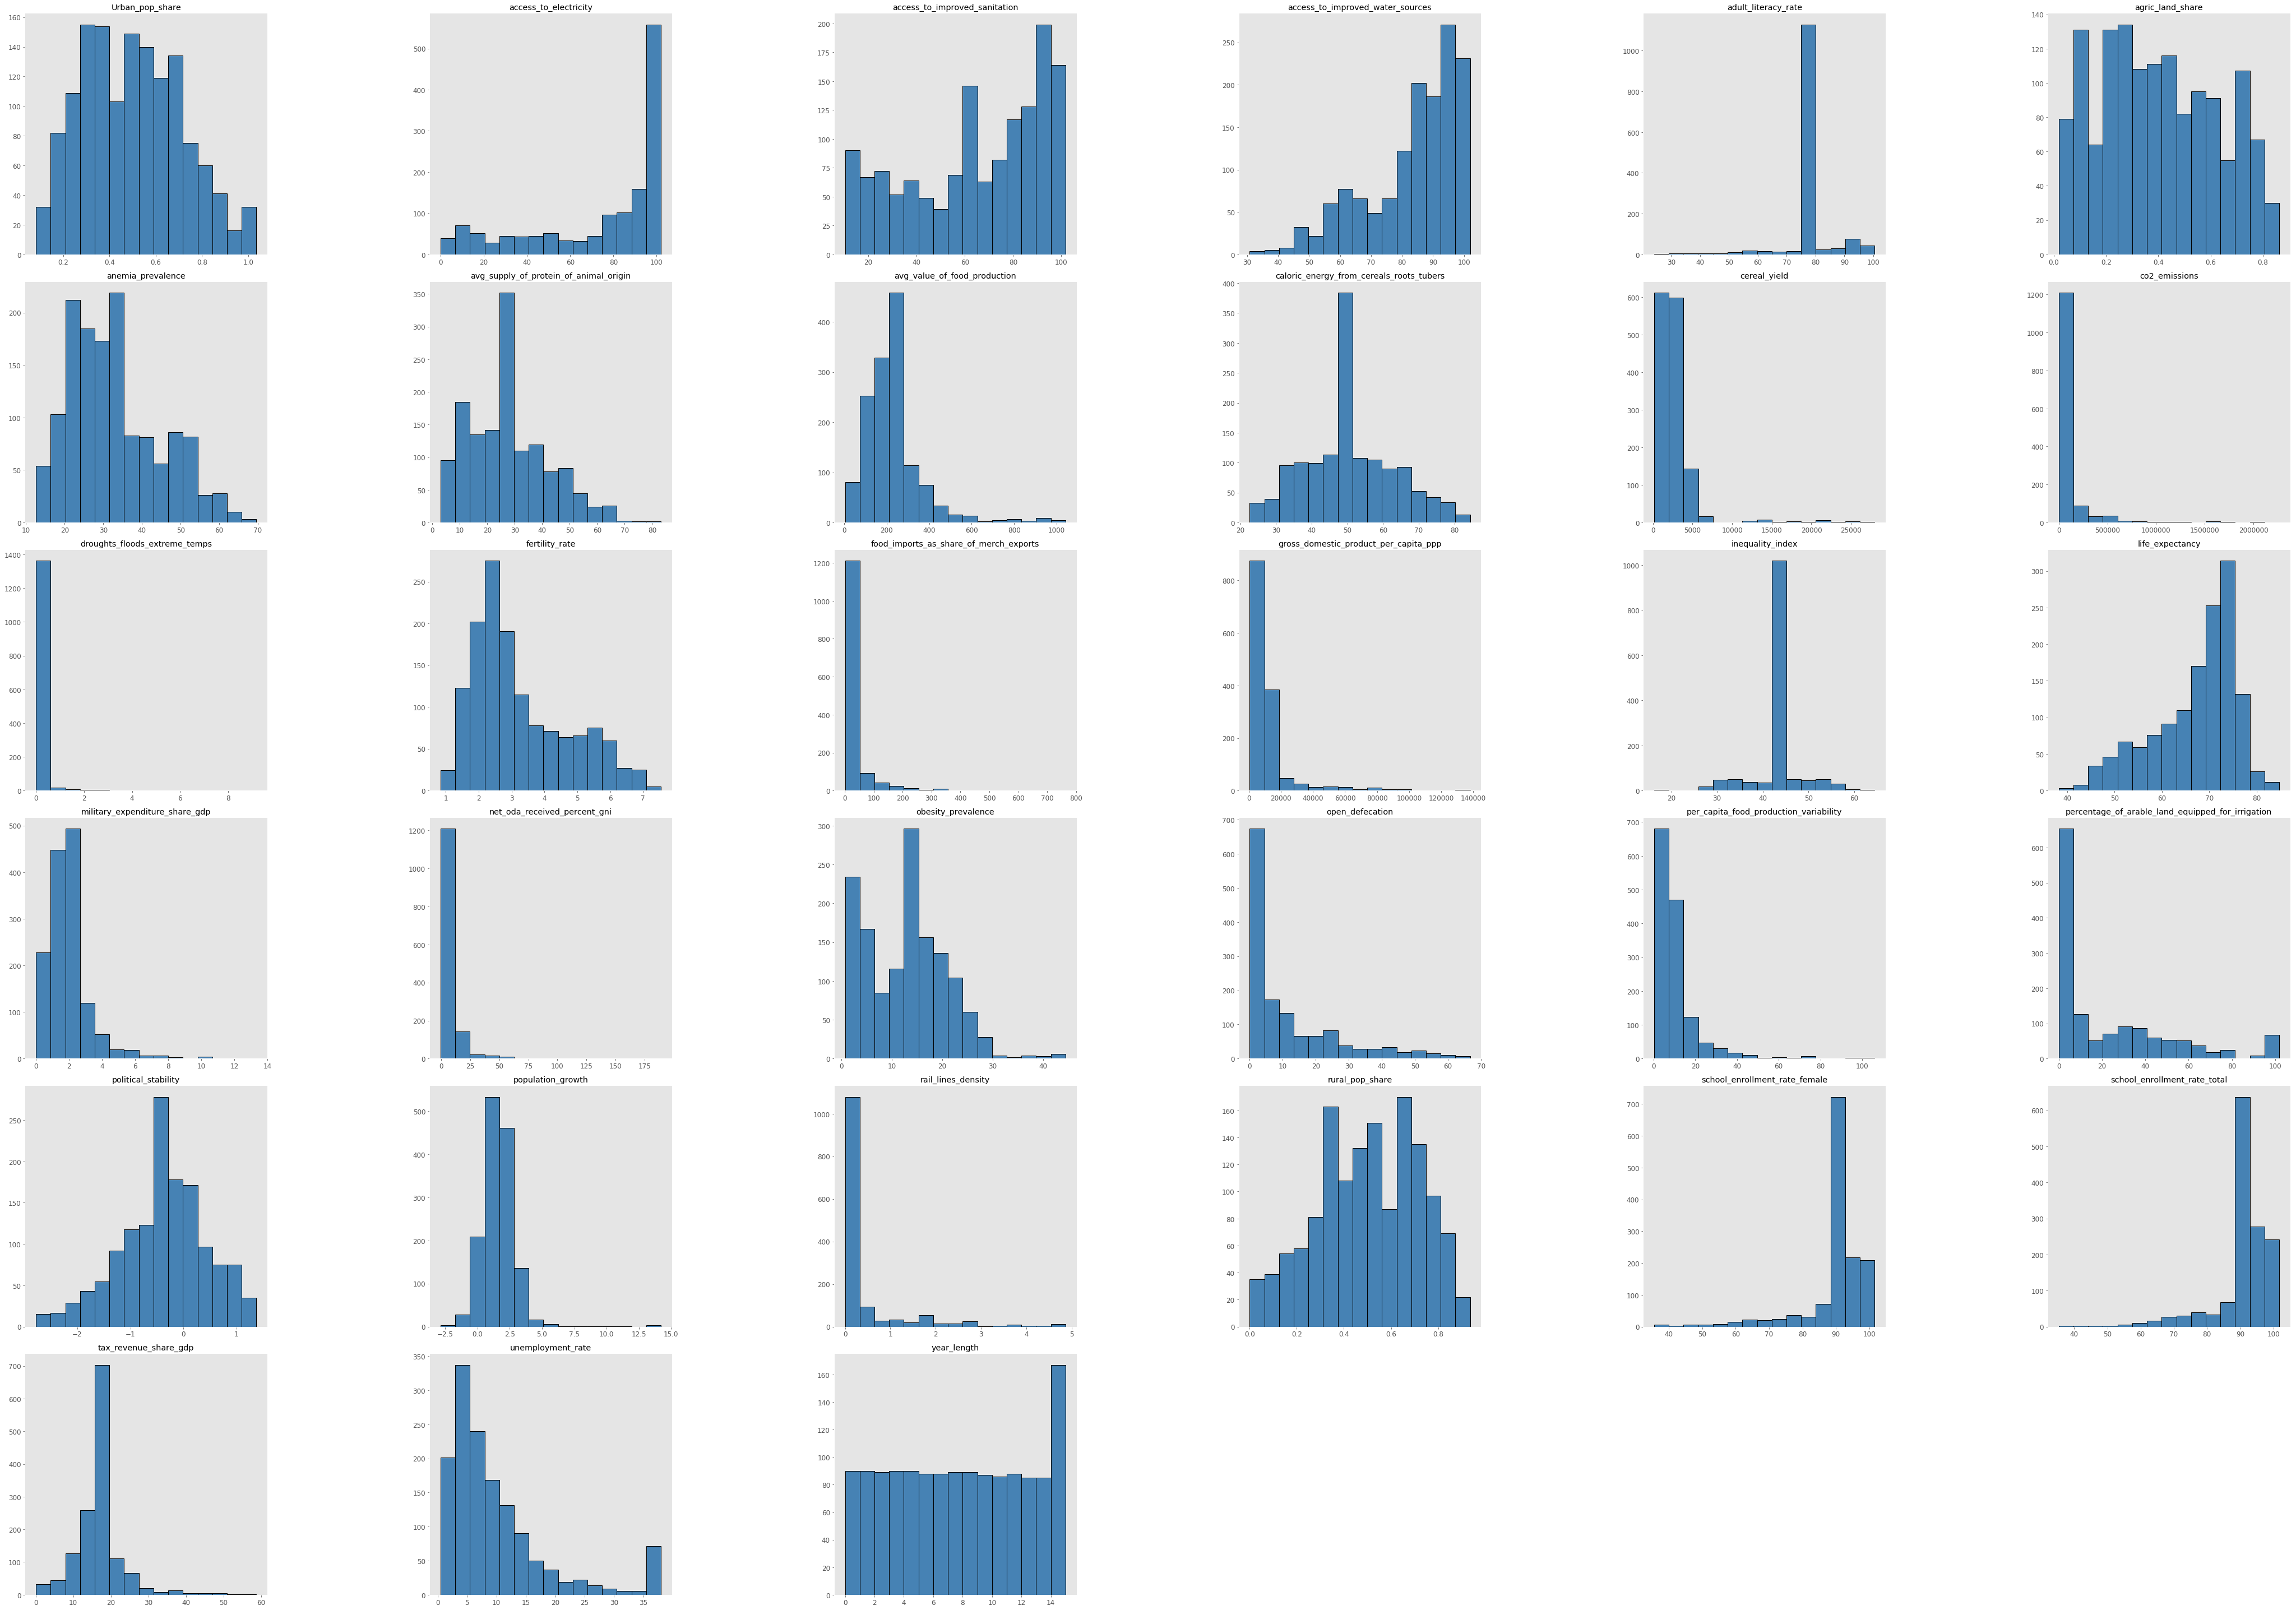

In [1153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
X.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=False)    
plt.tight_layout(rect=(0, 0, 10, 10))   

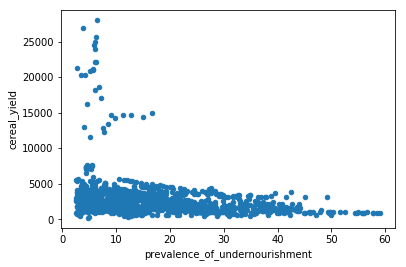

In [24]:
dataset.plot.scatter(x='prevalence_of_undernourishment', y='cereal_yield')

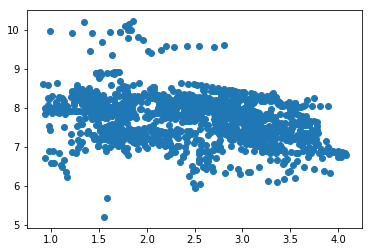

In [26]:
import matplotlib.pylab as plt
X=np.log(dataset['prevalence_of_undernourishment'])
Y=np.log(dataset['cereal_yield'])
plt.scatter(X,Y)

In [1293]:
#  from pandas.plotting import scatter_matrix
# scatter_matrix(dataset, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [631]:
#smaller variables
XS = dataset[['fertility_rate','open_defecation','rural_pop_share','adult_literacy_rate','Urban_pop_share', \
            'life_expectancy','avg_supply_of_protein_of_animal_origin','access_to_improved_sanitation', \
            'obesity_prevalence','access_to_electricity','access_to_improved_water_sources']]


In [1297]:
X.shape

(1401, 33)

In [1171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1172]:
# Now apply the transformations to the data:
std_data = scaler.transform(X)

In [1173]:
std_data.shape

(1401, 33)

In [1174]:
df = pd.DataFrame(std_data)
df['y']=y
df['country_code']=dataset['country_code']
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,y,country_code
0,0.556991,-0.669991,-0.12892,1.829690e+00,-7.625255e-01,0.945754,-1.205571,-2.501771e-01,-0.456566,-1.385507e-15,-0.342929,0.000000,-0.722249,-1.731558e-15,5.870913e-15,0.000000,-1.170720,1.050437,-7.871388e-01,-1.698203e+00,2.256302,-0.567892,1.147004,-0.443561,-0.684148,-0.310045,0.544640,3.841199e+00,-1.247071,-1.069915,1.000139,0.162320,-1.173866,31.260713,889f053
1,-0.059666,0.471234,-0.12892,-1.717154e-01,-2.814202e-01,-0.259084,0.261675,-4.690498e-01,-0.419521,-1.215076e+00,-0.155355,-0.474582,-0.473938,-1.731558e-15,4.172377e-01,0.687481,-0.961857,1.380139,-5.564123e-02,-8.153177e-01,0.353681,-1.305771,1.195754,-0.443561,0.125549,-0.373323,-1.034046,-1.295398e+00,0.498172,-0.685178,0.604023,-1.354446,1.002952,18.298233,9e614ab
2,-0.665246,-0.431777,-0.12892,-6.492946e-01,8.279889e-01,0.395393,-0.842703,3.612459e-01,0.509449,-1.385507e-15,-0.427176,-0.632905,-0.704470,-1.731558e-15,5.870913e-15,0.000000,1.329693,-1.806897,7.511074e-01,9.565256e-01,-0.475549,0.756906,-0.690602,-0.443561,0.555834,-0.379553,3.140797,-1.504635e-15,1.259111,-0.834916,0.826449,-0.882589,-1.609230,39.513397,100c476
3,-0.225504,-0.599257,-0.12892,-7.193826e-01,8.681191e-01,-0.346981,0.749293,-4.718916e-16,-0.008845,-1.385507e-15,-0.396544,0.000000,0.438066,-1.731558e-15,5.870913e-15,1.073234,0.000000,0.000000,9.845014e-01,8.242522e-01,-0.318079,1.327346,-0.676117,1.024237,0.808181,-0.255469,0.674546,-2.206255e-01,-0.677298,0.707552,-0.777254,1.125354,1.220634,4.444016,4609682
4,-0.819342,-0.491848,-0.12892,-9.105489e-16,-4.879804e-15,-1.126166,0.970703,6.476176e-01,-0.028383,-1.385507e-15,-0.106693,1.293960,1.108241,-1.731558e-15,-4.546464e-02,-0.243167,1.632589,-1.313797,-2.569672e-15,-1.902732e-15,-0.667351,0.920004,-0.275630,-0.443561,0.580794,-0.380492,3.140797,-1.504635e-15,1.632138,0.798337,-0.825818,-0.440523,0.132225,4.940301,be2a7f5


In [1175]:
from sklearn.model_selection import train_test_split
Train = pd.DataFrame()
Test  = pd.DataFrame()
# unique country codes
for level in df.loc[:,"country_code"].unique():
    #print(level)
    df_s = df.loc[dataset["country_code"]==level,df.columns[0:len(df)]] 
    train, test = train_test_split(df_s, test_size=0.20, random_state=5)
    Test=Test.append(test,ignore_index=False)
    Train=Train.append(train,ignore_index=False)

In [1176]:
X_train=Train.drop(Train[['y','country_code']],axis=1)
X_test=Test.drop(Test[['y','country_code']],axis=1)
y_train=Train['y']
y_test=Test['y']

In [1177]:
X_train.shape, y_train.shape

((1054, 33), (1054,))

In [1116]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
import matplotlib.pyplot as plt

### RandomForestRegressor — scikit-learn ...

In [2167]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=2)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=2, verbose=0, warm_start=False)

In [2168]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predicted_test))
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

9.287479591978363
Out-of-bag R-2 score estimate: 0.917
Test data R-2 score: 0.935
Test data Spearman correlation: 0.961
Test data Pearson correlation: 0.97


In [349]:
rr=dataset[['rail_lines_density','unemployment_rate','tax_revenue_share_gdp','co2_emissions', \
         'percentage_of_arable_land_equipped_for_irrigation', 'military_expenditure_share_gdp', \
         'agric_land_share','food_imports_as_share_of_merch_exports','inequality_index']]

In [848]:
# subset and select new data with correlation greater than .24
new_df=dataset[['access_to_improved_water_sources','access_to_electricity','obesity_prevalence', \
                'access_to_improved_sanitation','avg_supply_of_protein_of_animal_origin','life_expectancy', \
                'Urban_pop_share','adult_literacy_rate','avg_value_of_food_production','school_enrollment_rate_female', \
                'political_stability','school_enrollment_rate_total','gross_domestic_product_per_capita_ppp', \
                'cereal_yield','per_capita_food_production_variability','droughts_floods_extreme_temps', \
                'population_growth','anemia_prevalence','caloric_energy_from_cereals_roots_tubers', \
                'net_oda_received_percent_gni','rural_pop_share','open_defecation','fertility_rate']]

In [851]:
scaler.fit(new_df)
std_df = scaler.transform(new_df)

### Apply PCA to data

In [1926]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(std_train)
princ_df = pd.DataFrame(data = principalComponents, \
                        columns = ['princomp_1', 'princomp_2','princomp_3','princomp_4','princomp_5', \
                                  'princomp_6', 'princomp_7','princomp_8','princomp_9','princomp_10'])
#                                  'princomp_11', 'princomp_12','princomp_13','princomp_14','princomp_15'])

In [1918]:
# check the percentage of variance explained
sum(pca.explained_variance_ratio_ )

0.9454024644992131

In [976]:
f053_df=dataset[dataset.country_code==col]

In [974]:
# code_df=dataset.country_code
# code=pd.DataFrame(code_df.unique(),columns=['country_code'])
# for col in code:
#    # print(code[col])
# # groupby countires
# countries= dataset.groupby('country_code')
# # print countries and corresponding product df
# for country, country_df in countries:
#     print(country)
#     print(country_df)

### Fit Multi-layer Perceptron regressor.

In [2333]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(100,150,100,250,200,250,100,100),max_iter=15000)
mlp.fit(std_train,y_train)

In [2303]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp,sd_train,y_train, cv=4)

array([0.93521307, 0.90004909, 0.89829845, 0.85376575])

In [2300]:
pred =mlp.predict(std_test)

### Check Model performance

In [2301]:
mlp.score(std_test, y_test)

0.9315482939207824

In [2302]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

8.584772532703692

### Test for Features with correlation > 0.3 and >0.4

In [93]:
df_grp1=dataset[['country_code','prevalence_of_undernourishment','access_to_improved_water_sources','access_to_electricity','obesity_prevalence', \
                'access_to_improved_sanitation','avg_supply_of_protein_of_animal_origin', 'life_expectancy',\
                'Urban_pop_share', 'adult_literacy_rate','avg_value_of_food_production','school_enrollment_rate_female',\
                'political_stability','school_enrollment_rate_total','gross_domestic_product_per_capita_ppp', \
                'population_growth','anemia_prevalence','caloric_energy_from_cereals_roots_tubers',\
                'net_oda_received_percent_gni','rural_pop_share','open_defecation','fertility_rate']]
df_grp2=dataset[['country_code','prevalence_of_undernourishment','access_to_improved_water_sources','access_to_electricity','obesity_prevalence', \
                'access_to_improved_sanitation','avg_supply_of_protein_of_animal_origin', 'life_expectancy',\
                'Urban_pop_share', 'adult_literacy_rate','avg_value_of_food_production','school_enrollment_rate_female',\
                 'caloric_energy_from_cereals_roots_tubers',\
                'net_oda_received_percent_gni','rural_pop_share','open_defecation','fertility_rate']]

In [2272]:
df_grp1.shape, df_grp2.shape

((1401, 22), (1401, 17))

In [2258]:
from sklearn.model_selection import train_test_split
Train = pd.DataFrame()
Test  = pd.DataFrame()
# unique country codes
for level in df_grp2.loc[:,"country_code"].unique():
    #print(level)
    df_s = df_grp2.loc[df_grp2["country_code"]==level,df_grp2.columns[0:len(df_grp2)]] 
    train, test = train_test_split(df_s, test_size=0.20, random_state=5)
    Test=Test.append(test,ignore_index=False)
    Train=Train.append(train,ignore_index=False)

In [2259]:
X_train=Train.drop(Train[['country_code','prevalence_of_undernourishment']],axis=1)
X_test=Test.drop(Test[['country_code','prevalence_of_undernourishment']],axis=1)
y_train=Train['prevalence_of_undernourishment']
y_test=Test['prevalence_of_undernourishment']
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1054, 15), (1054,), (347, 15), (347,))

In [2274]:
X=df_grp1.drop(df_grp1[['country_code','prevalence_of_undernourishment']],axis=1)
y=df_grp1['prevalence_of_undernourishment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
X_train.shape, y_train.shape
# Fit Mlp after this step

((1120, 20), (1120,))

#### Fit the scaler only on the training Data and apply to test and train datasets

In [2275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [2276]:
# Now apply the transformations to the data:
std_train = scaler.transform(X_train)
std_test= scaler.transform(X_test)

#### Group 2 Data

In [1897]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_grp2, y, test_size=0.20, random_state=16)
X_train.shape, y_train.shape
# Fit Mlp after this step

((1120, 16), (1120,))

In [1898]:
# stamdardize for group 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
std_train = scaler.transform(X_train)
std_test= scaler.transform(X_test)

## Now let's pre-processed the TEST DATA

### Load Test Data

In [51]:
#load data from CSV
import pandas as pd
df_test=pd.read_csv('test_values.csv')
print('Data loaded')

Data loaded


### Creating new variables for Test data as done in the train data

In [52]:
df_test['Urban_pop_share']=df_test['urban_population']/df_test['total_population']
df_test['rural_pop_share']=df_test['rural_population']/df_test['total_population']
df_test['agric_land_share']=df_test['agricultural_land_area']/df_test['total_land_area']

### SELECT DESIRED VARIABLES

In [1055]:
testdata=df_test[['year','percentage_of_arable_land_equipped_for_irrigation', \
         'cereal_yield','droughts_floods_extreme_temps','fertility_rate','life_expectancy','population_growth', \
         'avg_value_of_food_production','food_imports_as_share_of_merch_exports','gross_domestic_product_per_capita_ppp', \
         'inequality_index','net_oda_received_percent_gni','tax_revenue_share_gdp','per_capita_food_production_variability',\
         'adult_literacy_rate','school_enrollment_rate_female','school_enrollment_rate_total','avg_supply_of_protein_of_animal_origin', \
        'caloric_energy_from_cereals_roots_tubers','access_to_improved_sanitation','access_to_improved_water_sources', \
        'anemia_prevalence','obesity_prevalence','open_defecation','rail_lines_density','access_to_electricity',\
        'co2_emissions','unemployment_rate','military_expenditure_share_gdp','political_stability',\
        'Urban_pop_share','rural_pop_share', 'agric_land_share']]

In [53]:
testdata=df_test
testdata.shape

(616, 49)

In [59]:
avg_1= testdata['proportion_of_seats_held_by_women_in_gov'].astype("float").mean(axis = 0)
testdata['proportion_of_seats_held_by_women_in_gov'].replace(np.nan, avg_1, inplace = True)
avg_2= testdata['total_labor_force'].astype("float").mean(axis = 0)
testdata['total_labor_force'].replace(np.nan, avg_2, inplace = True)
avg_3= testdata['per_capita_food_supply_variability'].astype("float").mean(axis = 0)
testdata['per_capita_food_supply_variability'].replace(np.nan, avg_3, inplace = True)
avg_4= testdata['cereal_import_dependency_ratio'].astype("float").mean(axis = 0)
testdata['cereal_import_dependency_ratio'].replace(np.nan, avg_4, inplace = True)
avg_5= testdata['net_oda_received_per_capita'].astype("float").mean(axis = 0)
testdata['net_oda_received_per_capita'].replace(np.nan, avg_5, inplace = True)
avg_6= testdata['trade_in_services'].astype("float").mean(axis = 0)
testdata['trade_in_services'].replace(np.nan, avg_6, inplace = True)

In [886]:
# # check missing data
# missing_data = testdata.isnull()
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("") 

In [54]:
# the assumption here is that if missing probably no irrigation system
testdata['percentage_of_arable_land_equipped_for_irrigation'].replace(np.nan, 0, inplace = True)
avg_1 = testdata['cereal_yield'].astype("float").mean(axis = 0)
testdata['cereal_yield'].replace(np.nan, avg_1, inplace = True)
testdata['droughts_floods_extreme_temps'].replace(np.nan, 0, inplace = True)
avg_2 = testdata['fertility_rate'].astype("float").mean(axis = 0)
testdata['fertility_rate'].replace(np.nan, avg_2, inplace = True)
avg_3 = testdata['life_expectancy'].astype("float").mean(axis = 0)
testdata['life_expectancy'].replace(np.nan, avg_3, inplace = True)
avg_4 = testdata['population_growth'].astype("float").mean(axis = 0)
testdata['population_growth'].replace(np.nan, avg_4, inplace = True)
avg_5 = testdata['avg_value_of_food_production'].astype("float").mean(axis = 0)
testdata['avg_value_of_food_production'].replace(np.nan, avg_5, inplace = True)
avg_6 = testdata['food_imports_as_share_of_merch_exports'].astype("float").mean(axis = 0)
testdata['food_imports_as_share_of_merch_exports'].replace(np.nan, avg_6, inplace = True)
avg_7 = testdata['gross_domestic_product_per_capita_ppp'].astype("float").mean(axis = 0)
testdata['gross_domestic_product_per_capita_ppp'].replace(np.nan, avg_7, inplace = True)
avg_8 = testdata['inequality_index'].astype("float").mean(axis = 0)
testdata['inequality_index'].replace(np.nan, avg_8, inplace = True)
avg_9 = testdata['net_oda_received_percent_gni'].astype("float").mean(axis = 0)
testdata['net_oda_received_percent_gni'].replace(np.nan, avg_9, inplace = True)
avg_10 = testdata['tax_revenue_share_gdp'].astype("float").mean(axis = 0)
testdata['tax_revenue_share_gdp'].replace(np.nan, avg_10, inplace = True)
avg_11 = testdata['per_capita_food_production_variability'].astype("float").mean(axis = 0)
testdata['per_capita_food_production_variability'].replace(np.nan, avg_11, inplace = True)
avg_12 = testdata['adult_literacy_rate'].astype("float").mean(axis = 0)
testdata['adult_literacy_rate'].replace(np.nan, avg_12, inplace = True)
avg_13 = testdata['school_enrollment_rate_female'].astype("float").mean(axis = 0)
testdata['school_enrollment_rate_female'].replace(np.nan, avg_13, inplace = True)
avg_14 = testdata['school_enrollment_rate_total'].astype("float").mean(axis = 0)
testdata['school_enrollment_rate_total'].replace(np.nan, avg_14, inplace = True)
avg_15 = testdata['avg_supply_of_protein_of_animal_origin'].astype("float").mean(axis = 0)
testdata['avg_supply_of_protein_of_animal_origin'].replace(np.nan, avg_15, inplace = True)
avg_16 = testdata['caloric_energy_from_cereals_roots_tubers'].astype("float").mean(axis = 0)
testdata['caloric_energy_from_cereals_roots_tubers'].replace(np.nan, avg_16, inplace = True)
avg_17 = testdata['access_to_improved_sanitation'].astype("float").mean(axis = 0)
testdata['access_to_improved_sanitation'].replace(np.nan, avg_17, inplace = True)
avg_18= testdata['access_to_improved_water_sources'].astype("float").mean(axis = 0)
testdata['access_to_improved_water_sources'].replace(np.nan, avg_18, inplace = True)
avg_19= testdata['anemia_prevalence'].astype("float").mean(axis = 0)
testdata['anemia_prevalence'].replace(np.nan, avg_19, inplace = True)
avg_20= testdata['obesity_prevalence'].astype("float").mean(axis = 0)
testdata['obesity_prevalence'].replace(np.nan, avg_20, inplace = True)
avg_21= testdata['open_defecation'].astype("float").mean(axis = 0)
testdata['open_defecation'].replace(np.nan, avg_21, inplace = True)
#railway not probably exit
testdata['rail_lines_density'].replace(np.nan, 0, inplace = True)
avg_22= testdata['access_to_electricity'].astype("float").mean(axis = 0)
testdata['access_to_electricity'].replace(np.nan, avg_22, inplace = True)
avg_23= testdata['co2_emissions'].astype("float").mean(axis = 0)
testdata['co2_emissions'].replace(np.nan, avg_23, inplace = True)
#assume that missing unemployment country has higher rate
max_1= testdata['unemployment_rate'].astype("float").max(axis = 0)
testdata['unemployment_rate'].replace(np.nan, max_1, inplace = True)
avg_24= testdata['military_expenditure_share_gdp'].astype("float").mean(axis = 0)
testdata['military_expenditure_share_gdp'].replace(np.nan, avg_24, inplace = True)
avg_25= testdata['political_stability'].astype("float").mean(axis = 0)
testdata['political_stability'].replace(np.nan, avg_25, inplace = True)
avg_26= testdata['agric_land_share'].astype("float").mean(axis = 0)
testdata['agric_land_share'].replace(np.nan, avg_26, inplace = True)

In [55]:
testdata['year_length']=testdata['year']-2000

In [61]:
Xtest=testdata.drop(testdata[['year']],axis=1)
Xtest.to_csv('clean_t2.csv')

#### Apply normalization to test data

In [124]:
#load data from CSV
import pandas as pd
df_Xtest=pd.read_csv('clean_test.csv')
print('Data loaded')

Data loaded


In [1820]:
# Now apply the transformations to the data:
stdX_test = scaler.transform(test_grp1)

In [1529]:
#save to dataframe
# tt = pd.DataFrame(std_test)
# tt.shape
test_grp1=df_Xtest[['access_to_improved_water_sources','access_to_electricity','obesity_prevalence', \
                'access_to_improved_sanitation','avg_supply_of_protein_of_animal_origin', 'life_expectancy',\
                'Urban_pop_share', 'adult_literacy_rate','avg_value_of_food_production','school_enrollment_rate_female',\
                'political_stability','school_enrollment_rate_total','gross_domestic_product_per_capita_ppp', \
                'population_growth','anemia_prevalence','caloric_energy_from_cereals_roots_tubers',\
                'net_oda_received_percent_gni','rural_pop_share','open_defecation','fertility_rate','year_length']]
test_grp2=df_Xtest[['access_to_improved_water_sources','access_to_electricity','obesity_prevalence', \
                'access_to_improved_sanitation','avg_supply_of_protein_of_animal_origin', 'life_expectancy',\
                'Urban_pop_share', 'adult_literacy_rate','avg_value_of_food_production','school_enrollment_rate_female',\
                 'caloric_energy_from_cereals_roots_tubers',\
                'net_oda_received_percent_gni','rural_pop_share','open_defecation','fertility_rate','year_length']]

In [1891]:
y_pred =mlp.predict(stdX_test)

In [1892]:
value=pd.DataFrame(y_pred,columns=['prevalence_of_undernourishment'])
value.index.name='row_id'
value.to_csv('y_pred_submissionS562.csv')

### RandomForestRegressor — scikit-learn ...

In [1127]:
 yrf_pred=rf.predict(std_test)

In [1128]:
value=pd.DataFrame(yrf_pred,columns=['prevalence_of_undernourishment'])
value.index.name='row_id'
value.to_csv('yrf_pred_submission.csv')

###  Sample Stuffs

In [815]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
XX, yy = iris.data, iris.target
XX.shape
XX_new = SelectKBest(chi2, k=2).fit_transform(XX, yy)
XX_new.shape

(150, 2)

### Split Data to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(princ_df, y, test_size=0.20, random_state=6)
X_train.shape, y_train.shape

### Smaller Dataset from Class Discussion

In [3]:
df_grp=dataset[['country_code','prevalence_of_undernourishment','school_enrollment_rate_total', \
                'caloric_energy_from_cereals_roots_tubers', 'anemia_prevalence', 'avg_value_of_food_production',\
                'droughts_floods_extreme_temps', 'unemployment_rate', 'access_to_electricity', \
                'access_to_improved_water_sources', 'co2_emissions', 'per_capita_food_production_variability', \
                'fertility_rate', 'population_growth', 'life_expectancy',  'gross_domestic_product_per_capita_ppp', \
                'school_enrollment_rate_female']]

In [98]:
df_grp3=dataset[['country_code','prevalence_of_undernourishment','access_to_improved_water_sources','obesity_prevalence', 'caloric_energy_from_cereals_roots_tubers', 'avg_supply_of_protein_of_animal_origin', 'Urban_pop_share', 'net_oda_received_percent_gni' ,'avg_value_of_food_production', 'fertility_rate', 'access_to_electricity', 'life_expectancy', 'gross_domestic_product_per_capita_ppp', 'political_stability', 'unemployment_rate', 'rail_lines_density','tax_revenue_share_gdp', 'school_enrollment_rate_total', 'population_growth','year_length', 'adult_literacy_rate', 'per_capita_food_production_variability', 'rural_pop_share', 'food_imports_as_share_of_merch_exports', 'co2_emissions', 'open_defecation','anemia_prevalence','military_expenditure_share_gdp']]

In [99]:
from sklearn.model_selection import train_test_split
Tr = pd.DataFrame()
Tt  = pd.DataFrame()
# unique country codes
for level in df_grp3.loc[:,'country_code'].unique():
    #print(level)
    df_s = df_grp3.loc[df_grp3["country_code"]==level,df_grp3.columns[0:len(df_grp)]] 
    train, test = train_test_split(df_s, test_size=0.20, random_state=0)
    Tt=Tt.append(test,ignore_index=False)
    Tr=Tr.append(train,ignore_index=False)

In [100]:
X_train=Tr.drop(Tr[['country_code','prevalence_of_undernourishment']],axis=1)
X_test=Tt.drop(Tt[['country_code','prevalence_of_undernourishment']],axis=1)
y_train=Tr['prevalence_of_undernourishment']
y_test=Tt['prevalence_of_undernourishment']
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1054, 26), (1054,), (347, 26), (347,))

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
# Now apply the transformations to the data:
std_train = scaler.transform(X_train)
std_test= scaler.transform(X_test)

In [9]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 800, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.2, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(std_train, y_train)
mse = mean_squared_error(y_test, clf.predict(std_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(std_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_grp.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Automatically created module for IPython interactive environment
MSE: 38.2198


<Figure size 1200x600 with 2 Axes>

In [57]:
dfX=df_Xtest[['school_enrollment_rate_total', \
                'caloric_energy_from_cereals_roots_tubers', 'anemia_prevalence', 'avg_value_of_food_production',\
                'droughts_floods_extreme_temps', 'unemployment_rate', 'access_to_electricity', \
                'access_to_improved_water_sources', 'co2_emissions', 'per_capita_food_production_variability', \
                'fertility_rate', 'population_growth', 'life_expectancy',  'gross_domestic_product_per_capita_ppp', \
                'school_enrollment_rate_female']]

In [137]:
tt= scaler.transform(dfX)

NameError: name 'dfX' is not defined

In [52]:
clf_pred=clf.predict(tt)
value=pd.DataFrame(clf_pred,columns=['prevalence_of_undernourishment'])
value.index.name='row_id'
value.to_csv('clf_pred_submission.csv')

#### Using Linear Regression Model

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(std_train,y_train)
reg.score(std_train, y_train)

0.6750712932902181

#### Using MLP Regression Model

In [133]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(175,150,175,250,),max_iter=7000)
mlp.fit(std_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(175, 150, 175, 250), learning_rate='constant',
       learning_rate_init=0.001, max_iter=7000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [134]:
yypred =mlp.predict(std_test)

In [2251]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp,std_train,y_train, cv=5)

array([ 0.48963268,  0.15048609,  0.5529685 , -0.12102618,  0.43182057])

In [135]:
mlp.score(std_test, y_test)

0.9516268462524575

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yypred)

6.861821065880835

In [2058]:
#sns.pairplot(df_grp)

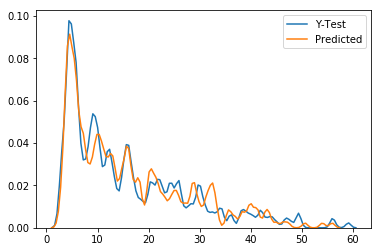

In [121]:
import seaborn as sns
sns.kdeplot(y_test, bw=.5, label="Y-Test")
sns.kdeplot(yypred, bw=.5, label="Predicted")
plt.legend();

In [125]:
df_test=df_Xtest[['access_to_improved_water_sources','obesity_prevalence', 'caloric_energy_from_cereals_roots_tubers', 'avg_supply_of_protein_of_animal_origin', 'Urban_pop_share', 'net_oda_received_percent_gni' ,'avg_value_of_food_production', 'fertility_rate', 'access_to_electricity', 'life_expectancy', 'gross_domestic_product_per_capita_ppp', 'political_stability', 'unemployment_rate', 'rail_lines_density','tax_revenue_share_gdp', 'school_enrollment_rate_total', 'population_growth','year_length', 'adult_literacy_rate', 'per_capita_food_production_variability', 'rural_pop_share', 'food_imports_as_share_of_merch_exports', 'co2_emissions', 'open_defecation','anemia_prevalence','military_expenditure_share_gdp']]

In [126]:
stz=scaler.transform(df_test)

In [128]:
pred_y =mlp.predict(stz)

In [129]:
value=pd.DataFrame(pred_y,columns=['prevalence_of_undernourishment'])
value.index.name='row_id'
value.to_csv('new_pred_submission.csv')

### SAMPLE FEATURE SELECTION

In [2185]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston
boston = load_boston()
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

C:\Users\LEKE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by their score:
[(1.0, 'RM'), (1.0, 'LSTAT'), (0.98, 'PTRATIO'), (0.46, 'B'), (0.39, 'CHAS'), (0.375, 'TAX'), (0.335, 'CRIM'), (0.19, 'INDUS'), (0.145, 'NOX'), (0.045, 'ZN'), (0.04, 'RAD'), (0.035, 'AGE'), (0.0, 'DIS')]


In [2130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
#use linear regression as the model
#lr = LinearRegression()
rf = RandomForestRegressor()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(rf, n_features_to_select=1)
rfe.fit(X,Y)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'RM'), (2, 'LSTAT'), (3, 'DIS'), (4, 'NOX'), (5, 'CRIM'), (6, 'TAX'), (7, 'PTRATIO'), (8, 'AGE'), (9, 'B'), (10, 'INDUS'), (11, 'RAD'), (12, 'ZN'), (13, 'CHAS')]


Automatically created module for IPython interactive environment
MSE: 6.7519


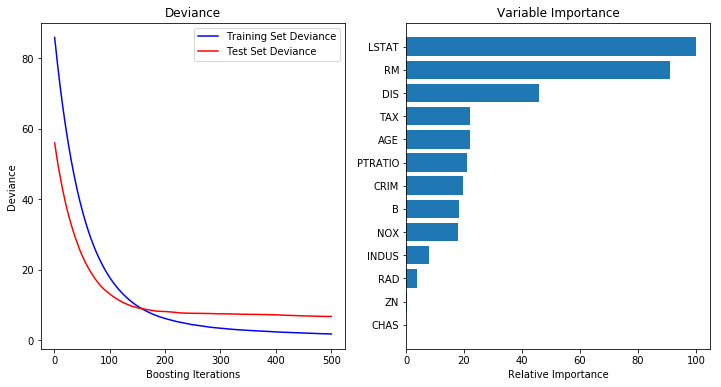

In [19]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [82]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
#     """Linear model designed by forward selection.

#     Parameters:
#     -----------
#     data : pandas DataFrame with all possible predictors and response

#     response: string, name of response column in data

#     Returns:
#     --------
#     model: an "optimal" fitted statsmodels linear model
#            with an intercept
#            selected by forward selection
#            evaluated by adjusted R-squared
#     """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [90]:
#X_Data=dataset.drop(dataset[['country_code','row_id' ]],axis=1)
model = forward_selected(X_Data, 'prevalence_of_undernourishment')

print (model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj) 
# 0.835190760538

prevalence_of_undernourishment ~ access_to_improved_water_sources + obesity_prevalence + caloric_energy_from_cereals_roots_tubers + avg_supply_of_protein_of_animal_origin + Urban_pop_share + net_oda_received_percent_gni + avg_value_of_food_production + fertility_rate + access_to_electricity + life_expectancy + gross_domestic_product_per_capita_ppp + political_stability + unemployment_rate + rail_lines_density + tax_revenue_share_gdp + school_enrollment_rate_total + population_growth + year_length + adult_literacy_rate + per_capita_food_production_variability + rural_pop_share + food_imports_as_share_of_merch_exports + co2_emissions + open_defecation + anemia_prevalence + military_expenditure_share_gdp + 1
0.6668452500823756


In [86]:
# add colunm name
X_Data=pd.DataFrame(sd_train,columns = X_train.columns)

In [88]:
X_Data['prevalence_of_undernourishment' ]=y_train

In [89]:
X_Data.head()

,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,fertility_rate,life_expectancy,population_growth,avg_value_of_food_production,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,inequality_index,...,access_to_electricity,co2_emissions,unemployment_rate,military_expenditure_share_gdp,political_stability,Urban_pop_share,rural_pop_share,agric_land_share,year_length,prevalence_of_undernourishment
0,-0.823231,-0.670584,-0.125529,0.712506,-0.265818,0.781206,0.002814,0.018352,-0.469484,-1.076200,...,-0.236881,-0.274033,0.391017,1.493042,-2.708183,-0.798074,0.673944,0.245806,1.443088,24.759563
1,1.160947,-0.654870,0.056446,1.046576,-0.538205,0.864931,-1.135190,-0.068391,-0.437177,0.004043,...,-0.351818,-0.267612,0.534787,2.741228,-2.368103,-0.909565,0.769992,0.196835,0.353848,26.040441
2,0.983500,-0.760270,-0.125529,1.543586,-0.568610,0.935837,-1.208019,-0.276941,-0.441789,-1.565967,...,-0.570951,-0.286342,0.695265,2.199747,-1.288700,-1.004948,0.916981,0.194906,-0.517544,30.598456
3,1.227681,-0.622061,-0.125529,0.967722,-0.318347,0.817178,-1.138865,-0.068946,-0.424787,0.004043,...,-0.350166,-0.269138,0.914428,1.992382,-2.457522,-0.856687,0.837721,0.189142,0.571696,26.109924
4,1.120615,-0.643356,-0.125529,0.871346,-0.451099,0.800386,-1.125163,-0.103234,-0.465300,0.004043,...,-0.307379,-0.289386,0.640209,2.264165,-2.449957,-0.821151,0.844479,0.183508,0.789544,25.439856


In [84]:
X_Data.columns = X_Data.columns.astype(str)